In [1]:
# ======================
# EMPLOYEE PERFORMANCE PREDICTION PROJECT
# ======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [2]:

# -----------------------
# 1️⃣ Data Creation
# -----------------------
np.random.seed(42)
num_records = 1000

data = {
    'EmployeeID': range(1, num_records + 1),
    'Age': np.random.randint(20, 60, num_records),
    'Department': np.random.choice(['IT', 'HR', 'Finance', 'Marketing', 'Sales'], num_records),
    'ExperienceYears': np.random.randint(0, 20, num_records),
    'HoursWorkedPerWeek': np.random.randint(25, 60, num_records),
    'SatisfactionLevel': np.round(np.random.uniform(0.1, 1.0, num_records), 2),
    'ProjectsCompleted': np.random.randint(0, 10, num_records),
    'LastPromotionYears': np.random.randint(0, 10, num_records),
}



In [3]:
# Target variable: Performance
performance = []
for i in range(num_records):
    if data['SatisfactionLevel'][i] < 0.4 or data['ProjectsCompleted'][i] < 3:
        performance.append('Low')
    elif 0.4 <= data['SatisfactionLevel'][i] < 0.7:
        performance.append('Average')
    else:
        performance.append('High')

data['Performance'] = performance



In [4]:
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('employee_performance_new.csv', index=False)
print("✅ CSV file 'employee_performance_new.csv' created successfully!")



✅ CSV file 'employee_performance_new.csv' created successfully!


In [5]:
# -----------------------
# 2️⃣ Data Understanding
# -----------------------
print("\nDATA INFO:")
print(df.info())





DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          1000 non-null   int64  
 1   Age                 1000 non-null   int32  
 2   Department          1000 non-null   object 
 3   ExperienceYears     1000 non-null   int32  
 4   HoursWorkedPerWeek  1000 non-null   int32  
 5   SatisfactionLevel   1000 non-null   float64
 6   ProjectsCompleted   1000 non-null   int32  
 7   LastPromotionYears  1000 non-null   int32  
 8   Performance         1000 non-null   object 
dtypes: float64(1), int32(5), int64(1), object(2)
memory usage: 50.9+ KB
None


In [6]:
print("\nDATA DESCRIPTION:")
print(df.describe())



DATA DESCRIPTION:
        EmployeeID          Age  ExperienceYears  HoursWorkedPerWeek  \
count  1000.000000  1000.000000      1000.000000         1000.000000   
mean    500.500000    39.991000         9.397000           42.048000   
std     288.819436    11.780055         5.845987           10.108703   
min       1.000000    20.000000         0.000000           25.000000   
25%     250.750000    30.000000         4.000000           33.000000   
50%     500.500000    41.000000         9.000000           42.000000   
75%     750.250000    50.250000        14.000000           51.000000   
max    1000.000000    59.000000        19.000000           59.000000   

       SatisfactionLevel  ProjectsCompleted  LastPromotionYears  
count        1000.000000        1000.000000         1000.000000  
mean            0.544260           4.557000            4.539000  
std             0.258419           2.919808            2.892896  
min             0.100000           0.000000            0.000000  
25

In [7]:
print("\nNULL VALUES:")
print(df.isnull().sum())




NULL VALUES:
EmployeeID            0
Age                   0
Department            0
ExperienceYears       0
HoursWorkedPerWeek    0
SatisfactionLevel     0
ProjectsCompleted     0
LastPromotionYears    0
Performance           0
dtype: int64


In [8]:

# 3️⃣ Data Quality Check
# -----------------------
print("\nDUPLICATES:", df.duplicated().sum())



DUPLICATES: 0


In [9]:

# -----------------------
# 4️⃣ Data Exploration
# -----------------------
print("\nCATEGORY COUNTS:")
print(df['Performance'].value_counts())


CATEGORY COUNTS:
Performance
Low        541
High       233
Average    226
Name: count, dtype: int64


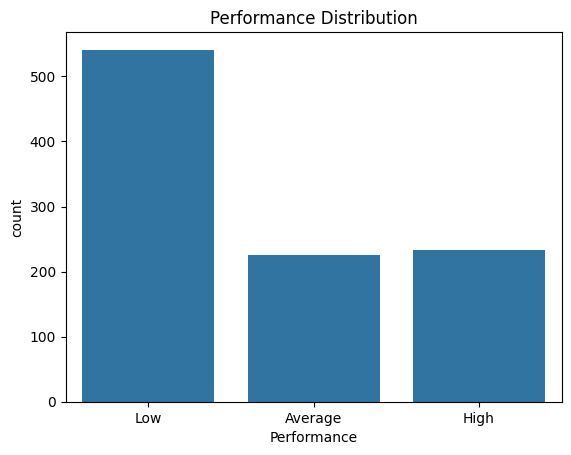

In [10]:
sns.countplot(x='Performance', data=df)
plt.title("Performance Distribution")
plt.show()



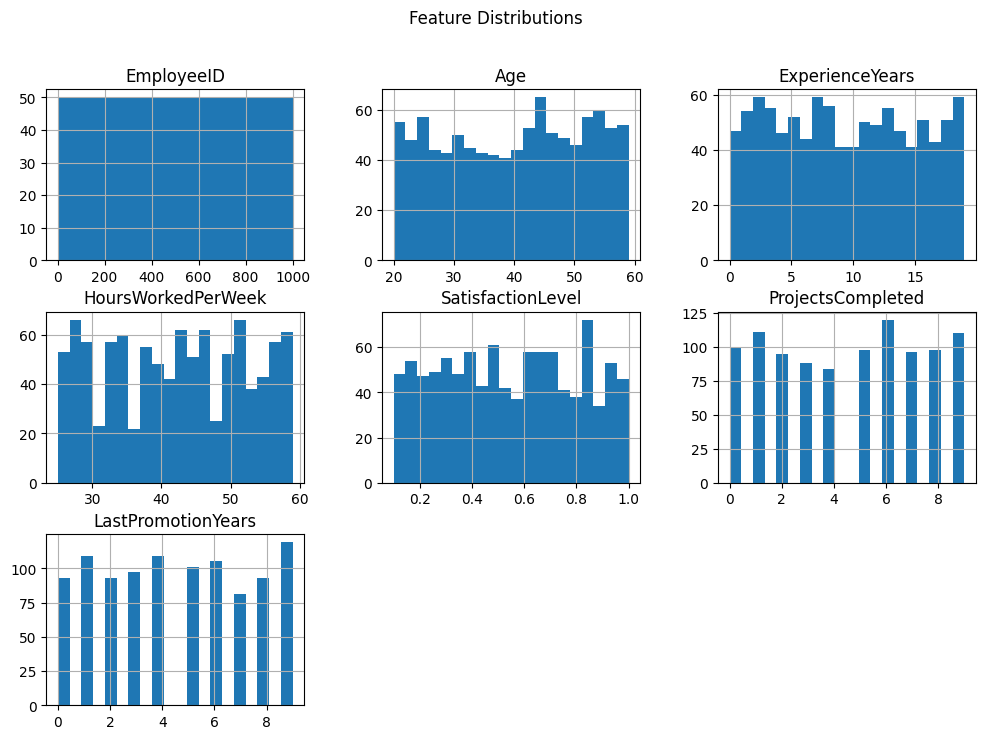

In [11]:
# Histograms
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()



In [12]:
# -----------------------
# 5️⃣ Feature Engineering
# -----------------------
df['ExperienceCategory'] = pd.cut(df['ExperienceYears'], bins=[0, 5, 10, 20], labels=['Junior', 'Mid', 'Senior'])
df['Overworked'] = np.where(df['HoursWorkedPerWeek'] > 50, 1, 0)

print("\nNew Features Added: ExperienceCategory & Overworked")




New Features Added: ExperienceCategory & Overworked


In [13]:
# Encode categorical variables
# Encode categorical variables properly
encoders = {}

for col in ['Department', 'ExperienceCategory', 'Performance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le




In [14]:
# -----------------------
# 6️⃣ Train-Test Split
# -----------------------
X = df.drop(['EmployeeID', 'Performance'], axis=1)
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:

# -----------------------
# 7️⃣ Feature Scaling
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
# -----------------------
# 8️⃣ Model Building
# -----------------------
model = LogisticRegression(multi_class='ovr', max_iter=500)
model.fit(X_train_scaled, y_train)

# -----------------------
# 9️⃣ Evaluation
# -----------------------
y_pred = model.predict(X_test_scaled)



C:\Users\Sudeshna\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print("\nACCURACY SCORE:", accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:")



CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.27      0.40        45
           1       0.75      0.96      0.84        47
           2       0.80      0.93      0.86       108

    accuracy                           0.79       200
   macro avg       0.78      0.72      0.70       200
weighted avg       0.79      0.79      0.75       200


ACCURACY SCORE: 0.785

CONFUSION MATRIX:


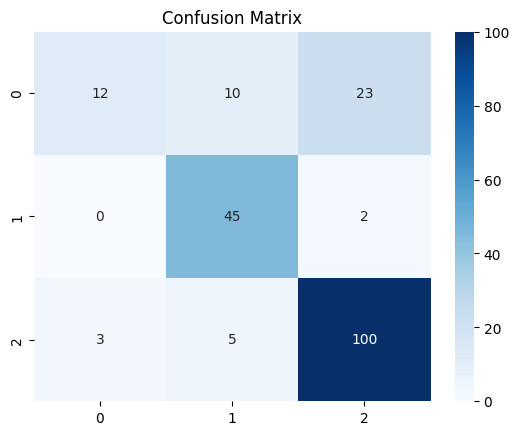

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [19]:

# -----------------------
# 🔟 Save Model
# -----------------------
joblib.dump(model, 'employee_performance_model.pkl')
print("✅ Model saved as 'employee_performance_model.pkl'!")



✅ Model saved as 'employee_performance_model.pkl'!


In [20]:
# -----------------------
# 1️⃣1️⃣ Predict on New Data
# -----------------------
new_data = pd.DataFrame({
    'Age': [28],
    'Department': [encoders['Department'].transform(['IT'])[0]],
    'ExperienceYears': [3],
    'HoursWorkedPerWeek': [55],
    'SatisfactionLevel': [0.45],
    'ProjectsCompleted': [4],
    'LastPromotionYears': [2],
    'ExperienceCategory': [encoders['ExperienceCategory'].transform(['Junior'])[0]],
    'Overworked': [1]
})

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

predicted_label = encoders['Performance'].inverse_transform(prediction)
print(f"\nPrediction for new employee: {predicted_label[0]}")



Prediction for new employee: Low
